In [1]:
import numpy as np
import pandas as pd

#import time dependencies
from datetime import datetime
import time
from datetime import date, timedelta
import datetime
import itertools as it

# Visualizing Data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib.ticker as mtick
import matplotlib as mpl
from matplotlib import colors

from matplotlib import style
# print(plt.style.available)
style.use(['classic','dark_background'])

# Stats
from scipy.stats import chi2
import collections
import random
import seaborn as sns
from scipy.stats import linregress
from scipy import stats
import statistics as st

#Web Scrapping
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
from collections import Counter
import requests
import re
import csv

In [2]:
#the data in this script is Discrete Data 
#probability mass function-assigns a probability to each possible value
#https://towardsdatascience.com/plotting-probabilities-for-discrete-and-continuous-random-variables-353c5bb62336

# Web Scrapping Lottery Numbers

In [3]:
# https://www.usamega.com/mega-millions/results/

In [4]:
page_num = 1
total_pages = 63
date=[]
winning_numbers=[]
mega_millions_numbers=[]
pages = np.arange(1, 2, 1)

while True:
    if page_num > total_pages: break
    page_num = str(page_num)
    url='https://www.usamega.com/mega-millions/results/'+page_num
    response = requests.get(url, timeout=5)
    soup = BeautifulSoup(response.content, "html.parser")

    for row in soup.select('tbody tr'):
        row_text = [x.text for x in row.find_all('li')]
        winning_numbers.append(row_text)
    page_num = int(page_num)
    page_num += 1

In [5]:
x=[i[:5] for i in winning_numbers]

In [6]:
winning_numbers 

[['17', '23', '36', '69', '70', '19', '2x'],
 ['29', '53', '56', '59', '67', '21', '2x'],
 ['7', '15', '25', '51', '60', '5', '3x'],
 ['1', '10', '18', '20', '46', '15', '2x'],
 ['19', '31', '37', '55', '67', '25', '4x'],
 ['15', '19', '33', '39', '68', '25', '3x'],
 ['3', '19', '24', '44', '50', '8', '3x'],
 ['7', '33', '53', '61', '65', '14', '2x'],
 ['4', '10', '27', '35', '58', '10', '2x'],
 ['9', '15', '34', '61', '64', '6', '2x'],
 ['26', '33', '45', '61', '68', '17', '3x'],
 ['8', '13', '35', '46', '68', '16', '3x'],
 ['6', '7', '14', '28', '59', '7', '2x'],
 ['23', '45', '53', '58', '62', '13', '5x'],
 ['18', '24', '27', '34', '60', '2', '2x'],
 ['7', '31', '44', '45', '55', '19', '3x'],
 ['14', '19', '34', '39', '59', '11', '2x'],
 ['6', '13', '34', '46', '62', '1', '3x'],
 ['18', '34', '44', '60', '69', '22', '2x'],
 ['46', '54', '57', '58', '66', '10', '3x'],
 ['27', '32', '50', '52', '57', '12', '5x'],
 ['11', '44', '45', '46', '70', '25', '2x'],
 ['5', '11', '25', '27', '6

In [7]:
len(winning_numbers) 

1638

In [8]:
gold=[i[5] for i in winning_numbers]
gold = list(map(int, gold))

#### Limit the length of list

In [9]:
main_numbers=x[0:250] 
gold_list=gold[0:40] 

In [10]:
print(gold_list) 

[19, 21, 5, 15, 25, 25, 8, 14, 10, 6, 17, 16, 7, 13, 2, 19, 11, 1, 22, 10, 12, 25, 13, 17, 25, 19, 16, 12, 11, 22, 13, 21, 25, 22, 1, 12, 14, 23, 13, 9]


In [11]:
lst=list(map(float, it.chain.from_iterable(main_numbers))) 
lst = list(map(int, lst)) 
lst[:5] 

[17, 23, 36, 69, 70]

# Cleaning Winning Numbers

In [12]:
#count the number of times a # occurs in lst then sort them
d={}
[ d.update( {i:d.get(i, 0)+1} ) for i in lst ]
sorted_d = sorted(d.items())
#find the numbers that have not been called in the data set
#sort the list, and then look through a range from index 0 to 71
#Then if not in list return those numbers
lst.sort()

# Cleaning Gold Numbers

In [13]:
#create a dictionary and count occurances in gold_list
g={}
[ g.update( {i:g.get(i, 0)+1} ) for i in gold_list ]
#sort the list
sorted_g=sorted(g.items())

gold_list.sort()
def find_missing(gold_list): 
    return [x for x in range(gold_list[0], gold_list[-1]+1)  if x not in gold_list]
print("Missing Gold Numbers")
print(find_missing(gold_list))

###Finding numbers that are repeated exactly twice 
##there is an initial assumption that numbers repeated only twice are more likely to be called again than any other repetition
repeats_gold = [
    item 
    for item, count in collections.Counter(gold_list).items() 
    if count == 2
]
print("Gold Repeats")
print(repeats_gold)

Missing Gold Numbers
[3, 4, 18, 20, 24]
Gold Repeats
[1, 10, 11, 14, 16, 17, 21]


## Statisitics

#### Winning Numbers

In [14]:
stdev = st.pstdev(lst)
print('Winning Number Standard Deviation')
print(stdev)
variance = st.pvariance(lst)
print('Winning Number Variance')
print(variance)

Winning Number Standard Deviation
19.923413362172656
Winning Number Variance
396.94239999999996


#### Gold Numbers

In [15]:
print('Gold Standard Deviation')
stdevg = st.pstdev(gold_list)
print(stdevg)
print('Gold Variance')
varianceg = st.pvariance(gold_list)
print(varianceg)

Gold Standard Deviation
6.81354349806325
Gold Variance
46.424375


# Bins and Quartiles

#### Bins and Quartiles of Winning Numbers

In [16]:
# Equal Number of Observations
Qcuts=pd.qcut(lst, q=4)
Qcuts.value_counts() 

(0.999, 18.0]    322
(18.0, 35.0]     315
(35.0, 53.0]     309
(53.0, 70.0]     304
dtype: int64

In [17]:
#Defined Number of Bins
pd.cut(lst, bins=4).value_counts() 

(0.931, 18.25]    322
(18.25, 35.5]     315
(35.5, 52.75]     290
(52.75, 70.0]     323
dtype: int64

In [18]:
#Definding boundaries-linespace to provide an array of evenly spaced bins over a specified range
cut_bins = [0, 10, 20, 30, 40,50,60,70] 
Cut_lst = pd.cut(lst, bins=cut_bins)

In [19]:
#Defined Interval Ranges
interval_range = pd.interval_range(start=0, freq=10, end=70)
lst_interval = pd.cut(lst, bins=interval_range, labels=[1,2,3])
lst_interval

[(0, 10], (0, 10], (0, 10], (0, 10], (0, 10], ..., (60, 70], (60, 70], (60, 70], (60, 70], (60, 70]]
Length: 1250
Categories (7, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

#### Bins and Quartiles of Gold Numbers

In [20]:
#Equal Amount of Observations
Qcutsg=pd.qcut(gold_list, q=4)
Qcutsg.value_counts()

(0.999, 10.75]    10
(10.75, 14.0]     11
(14.0, 21.0]      10
(21.0, 25.0]       9
dtype: int64

In [21]:
#Defined Number of Bins
pd.cut(gold_list, bins=4).value_counts()

(0.976, 7.0]     6
(7.0, 13.0]     13
(13.0, 19.0]    10
(19.0, 25.0]    11
dtype: int64

In [22]:
#Defining Bin Boundaries
cut_binsg = [0, 5,10,15,20,25]
Cut_lstg = pd.cut(gold_list, bins=cut_bins)
Cut_lstg

[(0, 10], (0, 10], (0, 10], (0, 10], (0, 10], ..., (20, 30], (20, 30], (20, 30], (20, 30], (20, 30]]
Length: 40
Categories (7, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [23]:
# Evenly Spaced Boundaries
binzg=pd.cut(gold_list, bins=np.linspace(0, 25, 6))
binzg

[(0.0, 5.0], (0.0, 5.0], (0.0, 5.0], (0.0, 5.0], (5.0, 10.0], ..., (20.0, 25.0], (20.0, 25.0], (20.0, 25.0], (20.0, 25.0], (20.0, 25.0]]
Length: 40
Categories (5, interval[float64]): [(0.0, 5.0] < (5.0, 10.0] < (10.0, 15.0] < (15.0, 20.0] < (20.0, 25.0]]

In [24]:
#defined Interval Ranges
#use interval range for numbers and date ranges but cannot label bins
interval_rangeg = pd.interval_range(start=0, freq=5, end=25)
lst_intervalg = pd.cut(gold_list, bins=interval_rangeg, labels=[1,2,3])
lst_intervalg

[(0, 5], (0, 5], (0, 5], (0, 5], (5, 10], ..., (20, 25], (20, 25], (20, 25], (20, 25], (20, 25]]
Length: 40
Categories (5, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] < (20, 25]]

# Winning Number Bin Visualizations

#### Frequency For Winning Number Bins

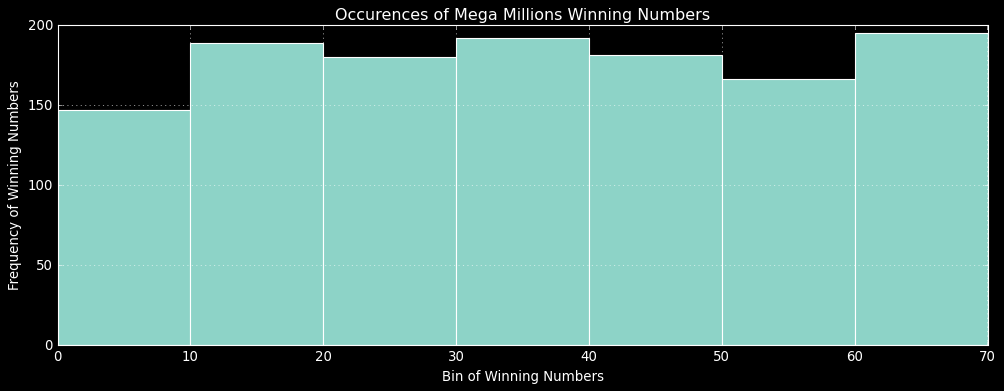

In [25]:
fig = plt.figure(figsize = (15, 5))
plt.hist(lst, bins=[0,10,20,30,40,50,60,70])  
plt.xlabel("Bin of Winning Numbers") 
plt.ylabel("Frequency of Winning Numbers") 
plt.title("Occurences of Mega Millions Winning Numbers")
plt.grid()
plt.savefig("Images/MegaMillions_BinFrequency.png", bbox_inches='tight')

#### Probability For Winning Number Bins

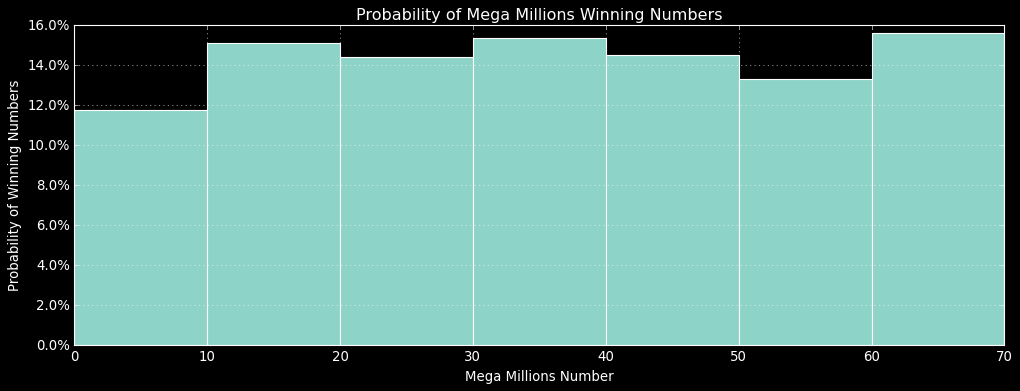

In [26]:
fig = plt.figure(figsize = (15, 5))
plt.hist(lst, bins=[0,10,20,30,40,50,60,70], density=True )    #density=True to convert to probablilities
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(.1))
plt.xlabel("Mega Millions Number") 
plt.ylabel("Probability of Winning Numbers") 
plt.title("Probability of Mega Millions Winning Numbers")
plt.grid()
plt.savefig("Images/MegaMillionsBinProbability.png", bbox_inches='tight')

# Gold Number Bin Visualizations

#### Frequency of Gold Number Bins

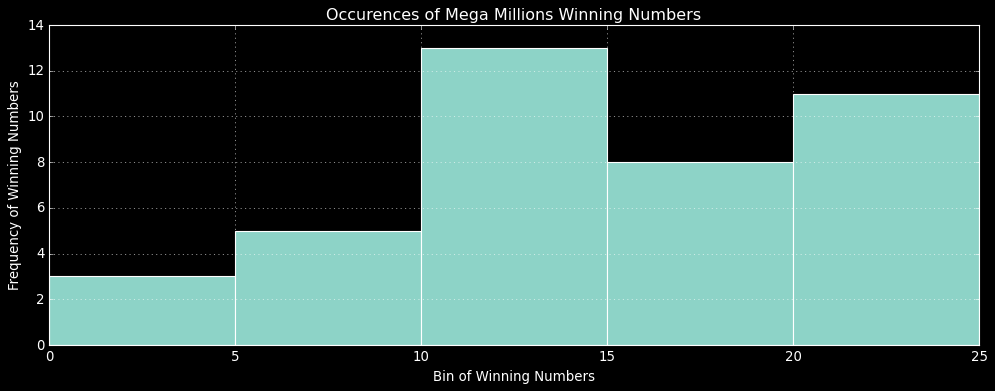

In [27]:
fig = plt.figure(figsize = (15, 5))
plt.hist(gold_list, bins=[0, 5, 10, 15, 20, 25])
plt.xlabel("Bin of Winning Numbers") 
plt.ylabel("Frequency of Winning Numbers") 
plt.title("Occurences of Mega Millions Winning Numbers")
plt.grid() 
plt.savefig("Images/GoldBinFrequency.png", bbox_inches='tight')
plt.show()

#### Probability of Gold Number Bins

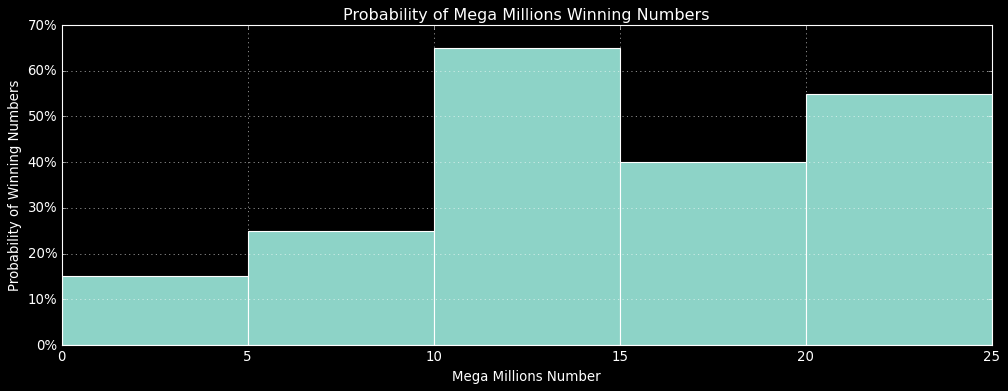

In [28]:
#The probability adds up to 100% because we have to multiply the probability of each of the bins by 5
fig = plt.figure(figsize = (15, 5))
plt.hist(gold_list, bins=[0, 5, 10, 15, 20, 25], density=True)          #density=True to get probability
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(.1))
plt.xlabel("Mega Millions Number") 
plt.ylabel("Probability of Winning Numbers") 
plt.title("Probability of Mega Millions Winning Numbers")
plt.grid()
plt.savefig("Images/GoldBinProbability.png", bbox_inches='tight')
plt.show() 

# Visualizing Winning Number

#### Scatter Plot Winning Numbers

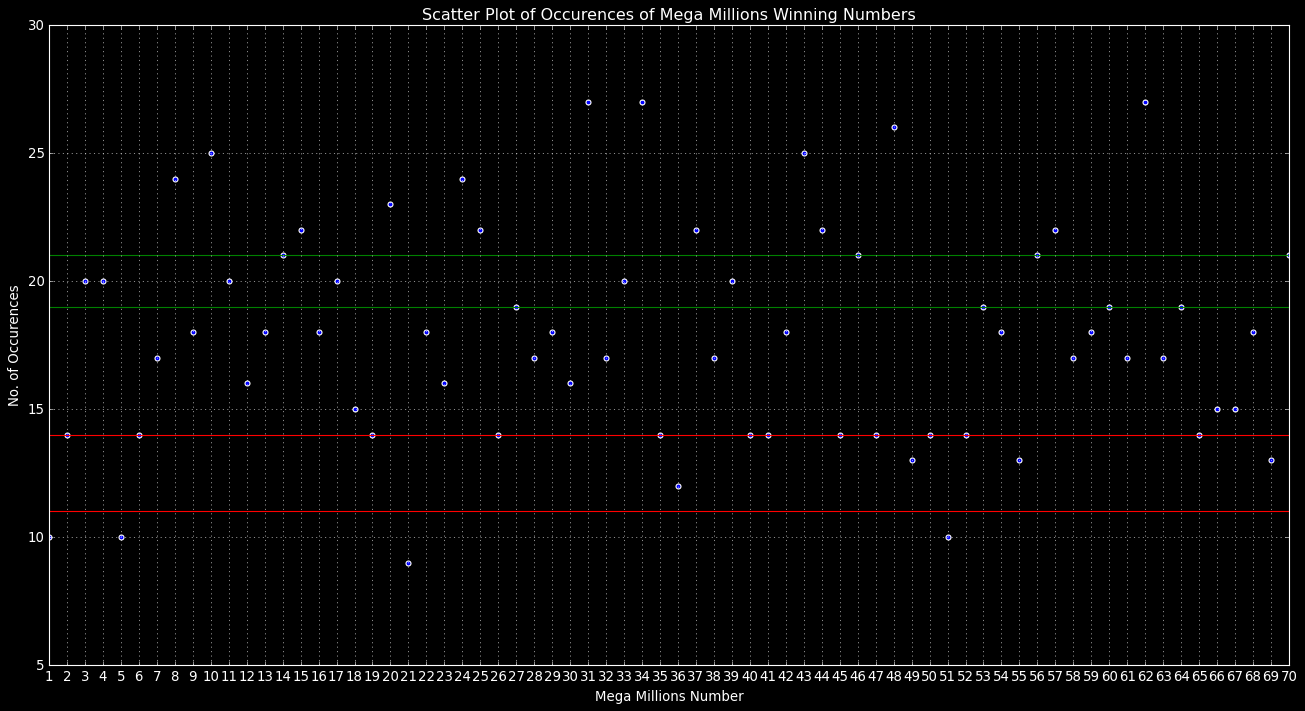

In [29]:
#unpack the list ofr x and y values using zip(data)
x, y = zip(*sorted_d)
#plot the # vs the number of occurces
fig = plt.figure(figsize = (20, 10))
plt.scatter(*zip(*sorted_d))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.axhline(y=19, color='g', linestyle='-')
plt.axhline(y=21, color='g', linestyle='-')

plt.axhline(y=11, color='r', linestyle='-')
plt.axhline(y=14, color='r', linestyle='-') 

# plt.autoscale(enable=True) 
plt.margins(x=0)


plt.xlabel("Mega Millions Number") 
plt.ylabel("No. of Occurences") 
plt.title("Scatter Plot of Occurences of Mega Millions Winning Numbers") 
plt.grid()
 # Call save fig beforee plt.show 
plt.savefig("Images/MegaMillions_Scatter.png", bbox_inches='tight')
plt.show()

#### Individual Bar Chart Winning Numbers

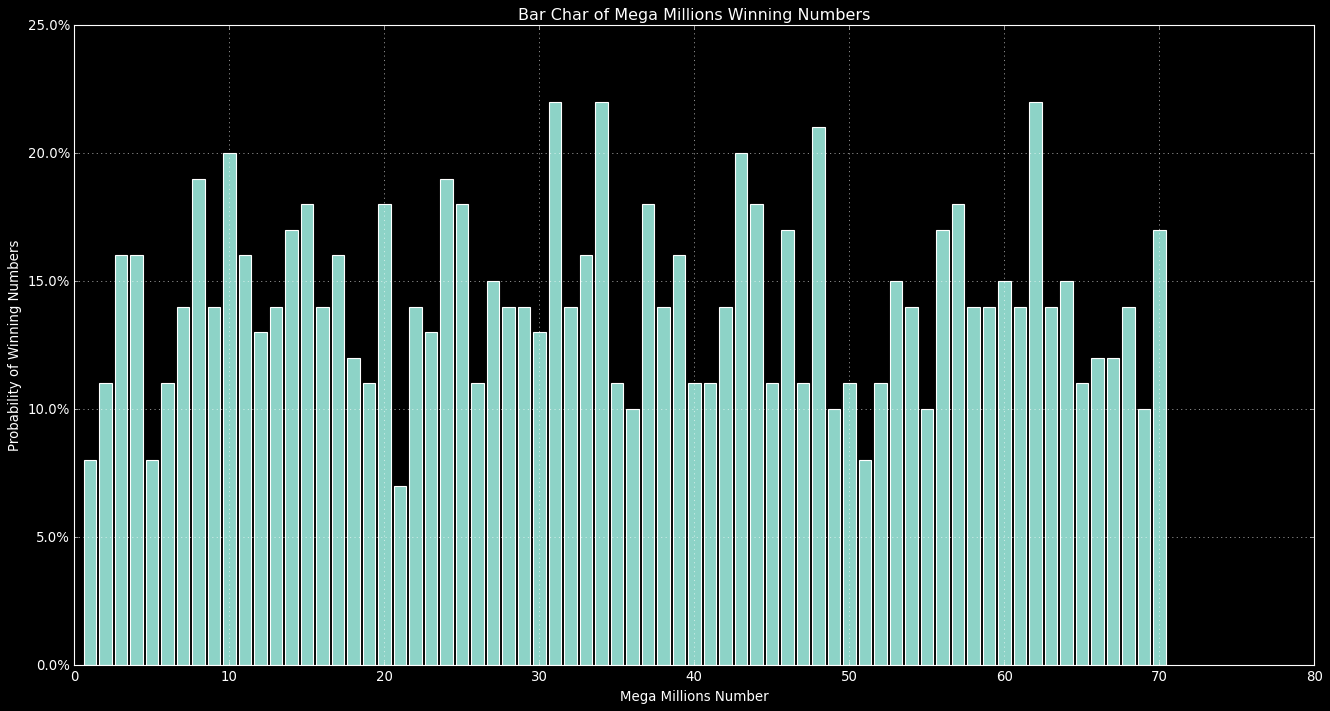

In [30]:
def frequencies(values):
    frequencies = {}
    for v in values:
        if v in frequencies:
            frequencies[v] += 1
        else:
            frequencies[v] = 1
    return frequencies
def probabilities(sample, freqs):
    probs = []
    for k,v in freqs.items():
        probs.append(round(v/len(sample),3))
    return probs
sample = lst                                    #lst is the list of numbers that are sorted
freqs = frequencies(sample)                     # frequency is how often the number occurs
probs = probabilities(sample, freqs)            #probabilility appends (#/length of the sample) to three decimal
x_axis = list(set(sample))                      # x_axis just counts the numbers from 1 to 70
fig = plt.figure(figsize = (20, 10))
plt.bar(x_axis, probs)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(.1))
plt.xlabel("Mega Millions Number") 
plt.ylabel("Probability of Winning Numbers") 
plt.title("Bar Char of Mega Millions Winning Numbers") 
plt.grid()
plt.savefig("Images/MegaMillionsProbabilityBar.png", bbox_inches='tight')
plt.show()

# Visualizing Gold Number

#### Scatter Plot Gold Numbers

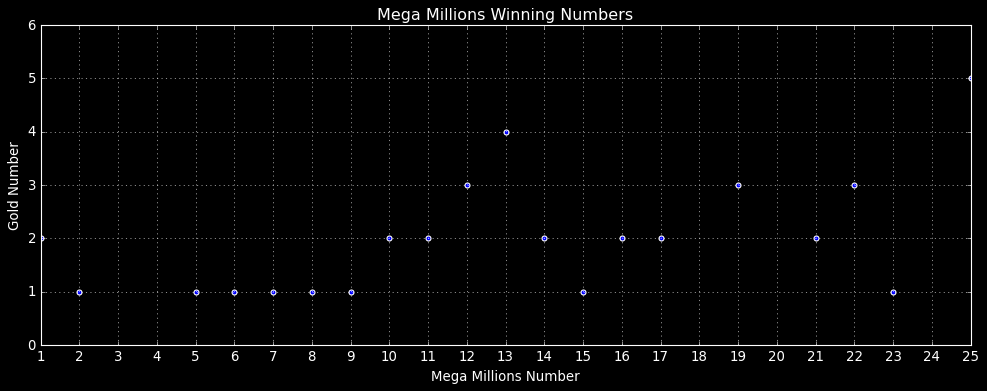

<Figure size 640x480 with 0 Axes>

In [31]:
#unpack the list ofr x and y values using zip(data)
x, y = zip(*sorted_g)
#plot the # vs the number of occurces
fig = plt.figure(figsize = (15, 5))
plt.scatter(*zip(*sorted_g))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.margins(x=0)

plt.xlabel("Mega Millions Number") 
plt.ylabel("Gold Number") 
plt.title("Mega Millions Winning Numbers") 
plt.grid()
plt.show() 
plt.savefig("MegaMillionsGold.png", bbox_inches='tight')
plt.savefig("Images/GoldScatter.png", bbox_inches='tight')
plt.show()

#### Individual Gold Numbers

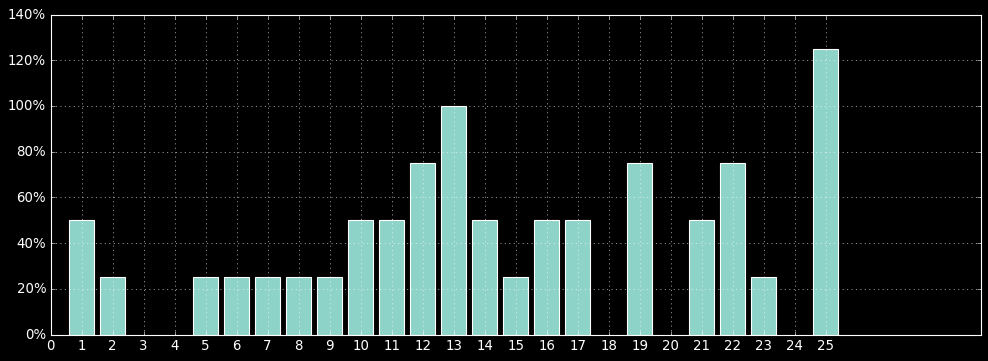

In [32]:
def frequenciesg(values):
    frequenciesg = {}
    for v in values:
        if v in frequenciesg:
            frequenciesg[v] += 1
        else:
            frequenciesg[v] = 1
    return frequenciesg
def probabilitiesg(samp, freqs):
    probs = []
    for k,v in freqs.items():
        probs.append(round(v/len(samp),3))
    return probs
sampg = gold_list                              #lst is the list of numbers that are sorted
freqsg = frequenciesg(sampg)                     # frequency is how often the number occurs
probsg = probabilitiesg(sampg, freqsg)            #probabilility appends (#/length of the sample) to three decimal
x_axis = list(set(sampg))                      # x_axis just counts the numbers from 1 to 25
fig = plt.figure(figsize = (15, 5))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(.1))
plt.bar(x_axis, probsg)
plt.xticks(np.arange(0, 26, 1.0))
plt.grid()
plt.savefig("Images/GoldBar.png", bbox_inches='tight')
plt.show()

# Determine Most Likely Winning Numbers

#### Pick RandomWinning Numbers

In [33]:
# Create a list of random numbers that could be choosen.
lotteryNumbers = [] 

for i in range (5):
    number = random.randint(0,60)
  #Check if this number has already been picked and ...
    while number in lotteryNumbers:
    # ... if it has, pick a new number instead 
        number = random.randint(0,60)
  
  #Now that we have a unique number, let's append it to our list.
    lotteryNumbers.append(number)

#Sort the list in ascending order
lotteryNumbers.sort()

#Display the list on screen:
print("Today's Random Numbers Are:") 
print(lotteryNumbers) 

Today's Random Numbers Are:
[9, 15, 18, 19, 31]


#### Pick Winning Numbers

In [34]:
###Finding numbers that are repeated exactly twice 
##there is an initial assumption that numbers repeated only twice are more likely to be called again than any other repetition
def find_missing(lst): 
    return [x for x in range(lst[0], lst[-1]+1)  if x not in lst]

once=[
    item
    for item,  count in collections.Counter(lst).items()
    if count <21 and count >=19]
repeats = [
    item 
    for item, count in collections.Counter(lst).items() 
    if count <19 and count >=14]
most_common=[
    item 
    for item, count in collections.Counter(lst).items() 
    if count >= 22]
print("Winning Numbers never chosen")
print(find_missing(lst))
print("Winning Numbers between 19 and 21")
print(once)
print("Winning Numbers between 14 and 18")
print(repeats)

lucky_Numbers=once+repeats+find_missing(lst)
lucky_Numbers.sort()
print('Lucky Winning Numbers')
# Lucky Numbers are the numbers that have never been chose, chosen once, or chosen twice.
print(lucky_Numbers)

print("Most Common Winning Numbers")
print(most_common)

Winning Numbers never chosen
[]
Winning Numbers between 19 and 21
[3, 4, 11, 17, 27, 33, 39, 53, 60, 64]
Winning Numbers between 14 and 18
[2, 6, 7, 9, 12, 13, 16, 18, 19, 22, 23, 26, 28, 29, 30, 32, 35, 38, 40, 41, 42, 45, 47, 50, 52, 54, 58, 59, 61, 63, 65, 66, 67, 68]
Lucky Winning Numbers
[2, 3, 4, 6, 7, 9, 11, 12, 13, 16, 17, 18, 19, 22, 23, 26, 27, 28, 29, 30, 32, 33, 35, 38, 39, 40, 41, 42, 45, 47, 50, 52, 53, 54, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68]
Most Common Winning Numbers
[8, 10, 15, 20, 24, 25, 31, 34, 37, 43, 44, 48, 57, 62]


# Determine Most Likely Gold Numbers

#### Pick Random Gold Numbers

In [35]:
# Create a list of random numbers that could be choosen.
GoldNumbers = []

for i in range (1):
    number = random.randint(10,25)
  #Check if this number has already been picked and ...
    while number in GoldNumbers:
    # ... if it has, pick a new number instead 
        number = random.randint(10,25)
  
  #Now that we have a unique number, let's append it to our list.
    GoldNumbers.append(number)

#Sort the list in ascending order
GoldNumbers.sort()

#Display the list on screen:
print("Today's Gold Number Is:") 
print(GoldNumbers)

Today's Gold Number Is:
[18]


#### Pick Gold Numbers

In [36]:
def find_missing(gold_list): 
    return [x for x in range(gold_list[0], gold_list[-1]+1)  if x not in gold_list]
once_gold=[
    item
    for item,  count in collections.Counter(gold_list).items()
    if count == 1]
twice_gold = [
    item 
    for item, count in collections.Counter(gold_list).items() 
    if count == 2]
repeats_gold = [
    item 
    for item, count in collections.Counter(gold_list).items() 
    if count > 2]

print("Gold Numbers never chosen")
print(find_missing(gold_list))
print("Gold Numbers chosen once")
print(once_gold)
print("Gold Numbers chosen twice")
print(twice_gold)
print("GoldNumbers chosen more than twice")
print(repeats_gold)

gold_lucky_Numbers=once_gold+repeats_gold
gold_lucky_Numbers.sort()
print('Gold Numbers')
print(gold_lucky_Numbers)

Gold Numbers never chosen
[3, 4, 18, 20, 24]
Gold Numbers chosen once
[2, 5, 6, 7, 8, 9, 15, 23]
Gold Numbers chosen twice
[1, 10, 11, 14, 16, 17, 21]
GoldNumbers chosen more than twice
[12, 13, 19, 22, 25]
Gold Numbers
[2, 5, 6, 7, 8, 9, 12, 13, 15, 19, 22, 23, 25]
